
# Import Packages

In [1]:
import pandas as pd
import os
#import matplotlib.pyplot as pt
import pandas_profiling
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor


# Import Data

In [2]:
new_df =pd.read_excel(r'C:\Users\aviarora\Downloads\Compiled posts data JAN-AUG 2020.xlsx','Key Metrics')
new_df_1 = pd.read_excel(r'C:\Users\aviarora\Downloads\Compiled posts data JAN-AUG 2020.xlsx','Lifetime Talking About This(...')
new_df_2 = pd.read_excel(r'C:\Users\aviarora\Downloads\Compiled posts data JAN-AUG 2020.xlsx','Lifetime Post Stories by act...')
new_df_3 = pd.read_excel(r'C:\Users\aviarora\Downloads\Compiled posts data JAN-AUG 2020.xlsx','Lifetime Post Consumers by type')
new_df_4 = pd.read_excel(r'C:\Users\aviarora\Downloads\Compiled posts data JAN-AUG 2020.xlsx','Lifetime Post Consumptions b...')


# Data Join using Post ID

In [3]:
final_df = pd.merge(new_df, new_df_2, left_on='Post ID', right_on='Post ID', how='left').drop(['Permalink_y','Post Message_y','Type_y','Posted_y','Audience targeting_y'], axis=1)

In [4]:
final_df = pd.merge(final_df, new_df_4, left_on='Post ID', right_on='Post ID', how='left').drop(['Permalink', 'Post Message', 'Type', 'Posted','Unnamed: 5'],axis=1)

In [5]:
new_df.shape

(509, 29)

# Creating Features from Date

In [6]:

minute=[]
hour=[]
month=[]
year=[]
quater=[]
dayname_of_week=[]
dayofweek=[]
week_number =[]
month_name =[]
for i in final_df['Posted_x']:
    c= i.hour
    minute.append(i.minute)
    hour.append(c)
    month.append(i.month)
    year.append(i.year)
    dayname_of_week.append(i.day_name())
    dayofweek.append(i.day_of_week)
    week_number.append((i.day - 1) // 7 + 1)
    month_name.append(i.month_name())
    
    if 0 <= c <= 6:
        quater.append('1')
    elif 7<= c <= 12:
        quater.append('2')
    elif 12 <= c <= 18:
        quater.append('3')
    else:
        quater.append('4')

In [7]:
final_df['Month']= month
final_df['Year'] = year
final_df['min']= minute
final_df['hour']=hour
final_df['Quater'] = quater
final_df['Day_Name']= dayname_of_week
final_df['Dayinweek'] =dayofweek
final_df['Week']= week_number
final_df['Month_Name'] = month_name


In [8]:
final_df['comment_Ture'] = final_df['comment'].notnull()

In [9]:
final_df['share_True'] = final_df['share'].notnull()

# Clean Post data (Removing digits)

In [10]:
import re
def removing_digit(list_val):
    new_post_messgae =[]
    for i in list_val:
        new_post_messgae.append(re.sub('[^A-Za-z]+', ' ', str(i)))
    return new_post_messgae

In [11]:
final_df['Post Message_x'] = final_df['Post Message_x'].fillna(value='Missing')

In [12]:
final_df['Clean_post'] = removing_digit(final_df['Post Message_x'])

# Calculate Sentiments 

In [13]:
final_df['sentiment'] = final_df["like"] - final_df["Lifetime Negative Feedback"]

# Like Counts in every Quater

In [14]:
Like_count= final_df.groupby(['Quater'])['like'].agg(lambda x : x.sum()).reset_index()

C:\Users\aviarora\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  


<BarContainer object of 4 artists>

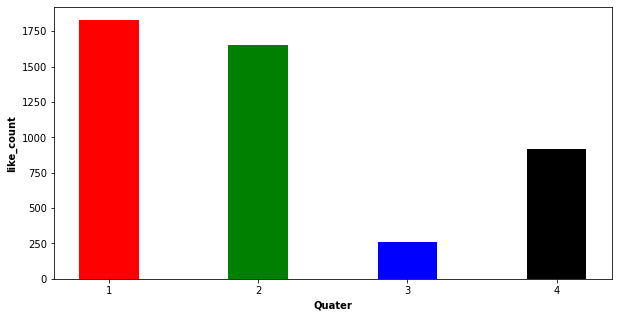

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5)) 
  
plt.xlabel('Quater', fontweight ='bold') 
plt.ylabel('like_count', fontweight ='bold')
# creating the bar plot 
plt.bar(Like_count['Quater'], Like_count['like'], color ='rgbkymc',  
        width = 0.4) 

# Like count in Every Month

In [16]:
like_in_month= final_df.groupby(['Month_Name'])['like'].agg(lambda x : x.sum()).reset_index()

C:\Users\aviarora\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  import sys


<BarContainer object of 8 artists>

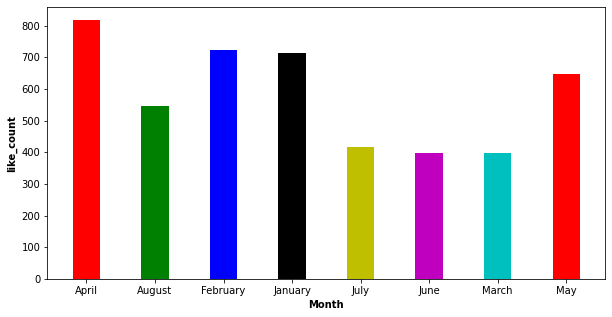

In [17]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.xlabel('Month', fontweight ='bold') 
plt.ylabel('like_count', fontweight ='bold')
plt.bar(like_in_month['Month_Name'], like_in_month['like'], color ='rgbkymc',  
        width = 0.4) 

# Post count Every Month

In [18]:
post_in_month= final_df.groupby(['Month_Name',])['Posted_x'].agg(lambda x : x.count()).reset_index()

In [19]:
post_in_month

,Month_Name,Posted_x
0,April,42
1,August,63
2,February,110
3,January,79
4,July,47
5,June,50
6,March,45
7,May,73


C:\Users\aviarora\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  import sys


<BarContainer object of 8 artists>

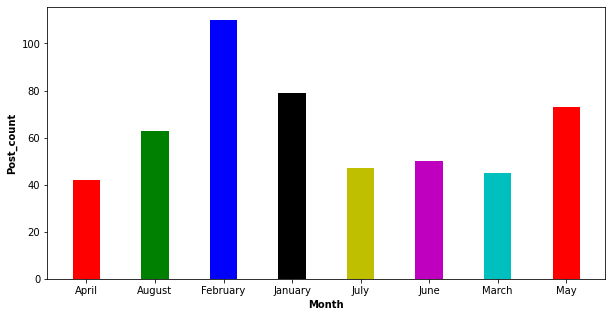

In [20]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.xlabel('Month', fontweight ='bold') 
plt.ylabel('Post_count', fontweight ='bold')
plt.bar(post_in_month['Month_Name'], post_in_month['Posted_x'], color ='rgbkymc',  
        width = 0.4) 

# Post and Like per Month

In [21]:
like_post = pd.merge(like_in_month, post_in_month, left_on='Month_Name', right_on='Month_Name', how='left')

<AxesSubplot:xlabel='Month_Name'>

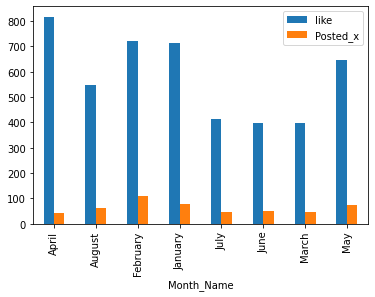

In [74]:
like_post.plot(x="Month_Name", y=["like", "Posted_x"], kind="bar")

# Heighest Comments on post

In [23]:
comment_post_like =  final_df[final_df['comment_Ture'] == True]

In [24]:
comment_post_like.groupby(['Type_x']).size()

Type_x
Photo          105
SharedVideo      4
Video            4
dtype: int64

In [25]:
comment_post_like = comment_post_like.sort_values(by=['comment'], ascending=False)

In [26]:
comment_post_like[['Post Message_x','comment','share','Posted_x']]

,Post Message_x,comment,share,Posted_x
269,😅😅😅😝😝😝,29.0,20.0,2020-04-25 10:47:16
237,🙏🙏🙏🙏,20.0,14.0,2020-04-03 00:51:31
163,Now we are registered under Ministry of Micro...,14.0,NaN,2020-02-16 02:55:49
226,Which saree is your favourite ??,12.0,NaN,2020-03-22 08:50:32
231,Quickest breakfast 😋😋😋😋 Paratha and Dahi ....w...,11.0,NaN,2020-03-30 00:01:17
...,...,...,...,...
408,"करूं क्यों फिक्र कि, मौत के बाद जगह कहां मिलेग...",1.0,NaN,2020-07-05 23:15:27
414,Summer special Linen Saree Prices Slashed : R...,1.0,NaN,2020-07-10 11:48:25
418,Night craving 😂😂😂,1.0,NaN,2020-07-12 14:47:14
419,What are you planning to gift your Nanad this ...,1.0,NaN,2020-07-12 14:54:41


In [27]:
comment_post_like.to_csv(r'Most_comment_post.csv',index=False)

In [28]:
# comment_post= final_df.groupby(['comment'])['Posted_x'].agg(lambda x : x.count()).reset_index()

In [29]:
# comment_post.plot(kind='bar')

# plt.show()

In [30]:
# fig = plt.figure(figsize = (10, 5)) 
  
# # creating the bar plot 
# plt.bar(comment_post['Month'], comment_post['Posted_x'], color ='rgbkymc',  
#         width = 0.4) 

# Positive Sentiment Dataframe and Word Cloud

In [31]:
positive_post = final_df[final_df['sentiment']>0]

In [ ]:
positive_post.to_csv(r'positive_post.csv',index=False)

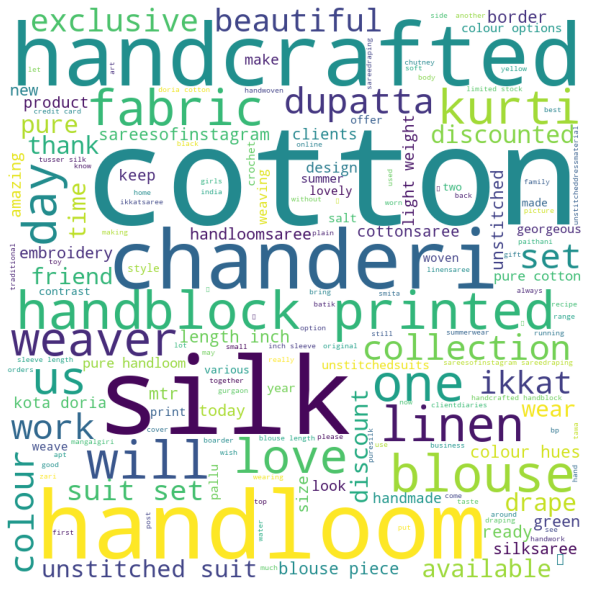

In [70]:
# Python program to generate WordCloud 

# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 


comment_words = '' 
stopwords = set(STOPWORDS) 
stopwords.add('whatsapp')
stopwords.add('rs')
stopwords.add('shipping')
stopwords.add('loophoop')
stopwords.add('saree')
stopwords.add('sarees')
stopwords.add('order')
stopwords.add('free')
stopwords.add('place')
stopwords.add('price')
stopwords.add('buy')
stopwords.add('client')

# iterate through the csv file 
for val in positive_post['Post Message_x']: 
	
	# typecaste each val to string 
	val = str(val) 

	# split the value 
	tokens = val.split()
	tokens_pos = val.lower().split()
	
	# Converts each token into lowercase 
	for i in range(len(tokens)): 
		tokens[i] = tokens[i].lower() 
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
				background_color ='white', 
				stopwords = stopwords, 
				min_font_size = 10).generate(comment_words) 

# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


# Negative Sentiment Dataframe and Word Cloud

In [33]:
negative_post = final_df[final_df['sentiment']<0]

In [ ]:
negative_post.to_csv(r'negative_post.csv',index=False)

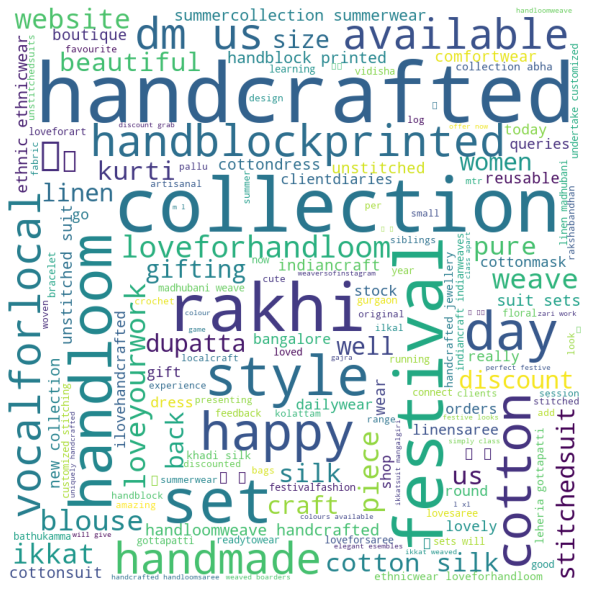

In [71]:
# Python program to generate WordCloud 

# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 


comment_words = '' 
stopwords = set(STOPWORDS) 
stopwords.add('whatsapp')
stopwords.add('rs')
stopwords.add('shipping')
stopwords.add('loophoop')
stopwords.add('saree')
stopwords.add('sarees')
stopwords.add('order')
stopwords.add('free')
stopwords.add('place')
stopwords.add('price')
stopwords.add('buy')
stopwords.add('client')

# iterate through the csv file 
for val in negative_post['Post Message_x']: 
	
	# typecaste each val to string 
	val = str(val) 

	# split the value 
	tokens = val.split()
	tokens_neg = val.lower().split()
	
	# Converts each token into lowercase 
	for i in range(len(tokens)): 
		tokens[i] = tokens[i].lower() 
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
				background_color ='white', 
				stopwords = stopwords, 
				min_font_size = 10).generate(comment_words) 

# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


In [35]:
final_df.groupby(['Type_x'])['Posted_x'].agg(lambda x : x.count()).reset_index()

,Type_x,Posted_x
0,Link,2
1,Photo,473
2,SharedVideo,6
3,Video,28


In [36]:
# from wordcloud import WordCloud, STOPWORDS 
# import matplotlib.pyplot as plt 
# import pandas as pd 

# Complete Post wordCloud

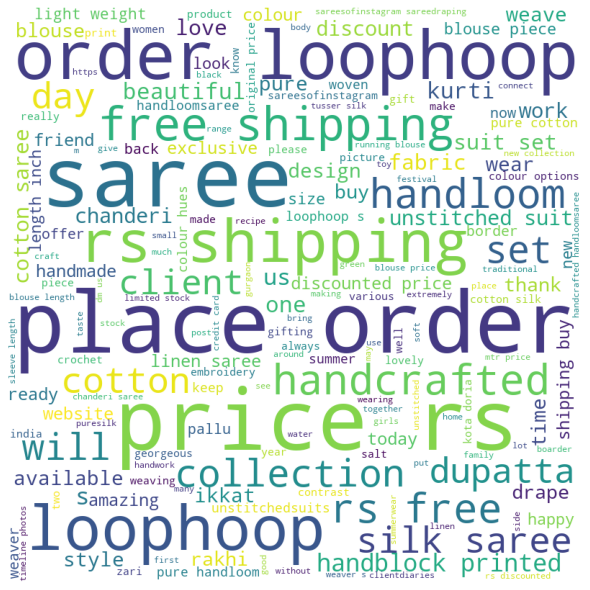

In [37]:
# Python program to generate WordCloud 

# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 


comment_words = '' 
stopwords = set(STOPWORDS) 
stopwords.add('whatsapp')

# iterate through the csv file 
for val in final_df['Clean_post']: 
	
	# typecaste each val to string 
	val = str(val) 

	# split the value 
	tokens = val.split() 
	
	# Converts each token into lowercase 
	for i in range(len(tokens)): 
		tokens[i] = tokens[i].lower() 
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
				background_color ='white', 
				stopwords = stopwords, 
				min_font_size = 10).generate(comment_words) 

# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


# Heat Map for Like Comment and many More

In [38]:
heat_map_df= final_df[['Lifetime Post Paid Reach','like','comment','share','other clicks','photo view','video play','link clicks']]

In [39]:
corr= heat_map_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Lifetime Post Paid Reach,like,comment,share,other clicks,photo view,video play,link clicks
Lifetime Post Paid Reach,1.000000,0.078732,-0.108443,-0.076673,0.006237,-0.034497,-0.285528,0.389784
like,0.078732,1.000000,0.774045,0.945213,0.634804,0.447463,0.220568,-0.521380
comment,-0.108443,0.774045,1.000000,0.949962,0.656970,0.341120,0.661605,nan
share,-0.076673,0.945213,0.949962,1.000000,0.701621,0.320094,nan,nan
other clicks,0.006237,0.634804,0.656970,0.701621,1.000000,0.392961,0.615400,0.175334
photo view,-0.034497,0.447463,0.341120,0.320094,0.392961,1.000000,-0.184263,-0.034205
video play,-0.285528,0.220568,0.661605,nan,0.615400,-0.184263,1.000000,nan
link clicks,0.389784,-0.521380,nan,nan,0.175334,-0.034205,nan,1.000000


# Tfidf_vectiorser

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
#from nltk.corpus import stopwords

In [41]:
cv= TfidfVectorizer(stop_words ='english')
vect = cv.fit_transform(final_df['Clean_post'])

In [42]:
dense = vect.todense()
feature_names = cv.get_feature_names()
denselist = dense.tolist()
df_tfidf = pd.DataFrame(denselist, columns=feature_names)

# Adding Columns to dataframe for predictions

In [43]:
# df_tfidf['Lifetime Post Total Reach'] = final_df['Lifetime Post Total Reach']
# df_tfidf['Lifetime Post organic reach'] = final_df['Lifetime Post organic reach']
# df_tfidf['Lifetime Post Paid Reach'] = final_df['Lifetime Post Paid Reach']
# df_tfidf['Lifetime Post Total Impressions'] = final_df['Lifetime Post Total Impressions']
# df_tfidf['Lifetime Post Organic Impressions'] = final_df['Lifetime Post Organic Impressions']
# df_tfidf['Lifetime Post Paid Impressions'] = final_df['Lifetime Post Paid Impressions']
# df_tfidf['Lifetime Engaged Users'] = final_df['Lifetime Engaged Users']
# df_tfidf['Lifetime Matched Audience Targeting Consumers on Post'] = final_df['Lifetime Matched Audience Targeting Consumers on Post']
# df_tfidf['Lifetime Matched Audience Targeting Consumptions on Post'] = final_df['Lifetime Matched Audience Targeting Consumptions on Post']
# df_tfidf['Lifetime Negative Feedback'] = final_df['Lifetime Negative Feedback']
# df_tfidf['Lifetime Post Impressions by people who have liked your Page'] = final_df['Lifetime Post Impressions by people who have liked your Page']
# df_tfidf['Lifetime Post reach by people who like your Page'] = final_df['Lifetime Post reach by people who like your Page']
# df_tfidf['Lifetime Paid reach of a post by people who like your Page'] = final_df['Lifetime Paid reach of a post by people who like your Page']
# df_tfidf['Lifetime Paid reach of a post by people who like your Page'] = final_df['Lifetime Paid reach of a post by people who like your Page']
# df_tfidf['Lifetime People who have liked your Page and engaged with your post'] = final_df['Lifetime People who have liked your Page and engaged with your post']
# df_tfidf['Lifetime Organic views to 95%'] = final_df['Lifetime Organic views to 95%']

In [44]:
df_tfidf['Month'] =final_df['Month']

df_tfidf['Year'] = final_df['Year']

df_tfidf['Quater']= final_df['Quater']

df_tfidf['hour'] = final_df['hour']

df_tfidf['min'] =  final_df['min']

df_tfidf['Day_Name'] = final_df['Day_Name']

df_tfidf['Week'] = final_df['Week']

# One-Hot Encoding

In [45]:
df_tfidf = pd.get_dummies(df_tfidf,columns=['Day_Name'])

In [46]:
df_tfidf = pd.get_dummies(df_tfidf,columns=['Week'])

In [47]:
df_tfidf = pd.get_dummies(df_tfidf,columns=['Quater'])

In [48]:
df_tfidf = pd.get_dummies(df_tfidf,columns=['Month'])

In [49]:
# df_tfidf.isnull().sum().any()

In [50]:
# df_tfidf.loc[:, df_tfidf.isnull().any()]

In [51]:
#df_tfidf['Dayinweek'] = final_df['Dayinweek']

In [52]:
#df_tfidf = pd.get_dummies(df_tfidf,columns=['Dayinweek'])

In [53]:
df_tfidf.drop(columns=['min','hour'],inplace=True)

In [54]:
# df_tfidf['Week'] = final_df['Week']

In [55]:
#df_tfidf['like']= final_df['like']

In [56]:
final_df['like'].fillna((final_df['like'].mean()), inplace=True)

# Train and Test Split

In [57]:
train_features, test_features, train_labels, test_labels = train_test_split(df_tfidf, final_df['like'], test_size = 0.25, random_state = 10)

# Grid Search

In [58]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 100, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_state = [int(x) for x in np.linspace(start = 5, stop = 200, num = 5)]
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'random_state': random_state,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [5, 53, 102, 151, 200], 'random_state': [5, 53, 102, 151, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 14, 24, 33, 43, 52, 62, 71, 81, 90, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [59]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 14, 24, 33, 43, 52, 62,
                                                      71, 81, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [5, 53, 102, 151, 200],
                                        'random_state': [5, 53, 102, 151, 200]},
                   random_state=42, verbose=2)

# best Perametres

In [60]:
rf_random.best_params_

{'random_state': 53,
 'n_estimators': 53,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 52,
 'bootstrap': False}

# Evaluation 

In [61]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [62]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels)
base_accuracy = evaluate(base_model, test_features, test_labels)

Model Performance
Average Error: 5.1524 degrees.
Accuracy = 34.54%.


In [63]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_features, test_labels)

Model Performance
Average Error: 4.2623 degrees.
Accuracy = 37.72%.


# Training Again

In [64]:
rf = RandomForestRegressor(n_estimators = 53, random_state = 53,min_samples_split = 10,min_samples_leaf=2,max_features='sqrt',max_depth=52,bootstrap=False)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=False, max_depth=52, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=10, n_estimators=53,
                      random_state=53)

# Prediction

In [65]:
predictions = rf.predict(test_features)

# Accuracy

In [66]:
errors = abs(predictions - test_labels)
mape = 100 * np.mean(errors / test_labels)
accuracy = 100 - mape

In [67]:
accuracy

37.72441246706204

# Importance

In [68]:
importances = list(rf.feature_importances_)
feature_list = list(df_tfidf.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: Month_4              Importance: 0.15
Variable: Day_Name_Saturday    Importance: 0.03
Variable: loophoop             Importance: 0.02
Variable: Day_Name_Thursday    Importance: 0.02
Variable: act                  Importance: 0.01
Variable: called               Importance: 0.01
Variable: cotton               Importance: 0.01
Variable: crochet              Importance: 0.01
Variable: cute                 Importance: 0.01
Variable: films                Importance: 0.01
Variable: friends              Importance: 0.01
Variable: hai                  Importance: 0.01
Variable: handcrafted          Importance: 0.01
Variable: looked               Importance: 0.01
Variable: mass                 Importance: 0.01
Variable: order                Importance: 0.01
Variable: picture              Importance: 0.01
Variable: place                Importance: 0.01
Variable: price                Importance: 0.01
Variable: rs                   Importance: 0.01
Variable: shipping             Importanc

Variable: table                Importance: 0.0
Variable: tablecloth           Importance: 0.0
Variable: tablecover           Importance: 0.0
Variable: tag                  Importance: 0.0
Variable: tailoring            Importance: 0.0
Variable: taken                Importance: 0.0
Variable: takes                Importance: 0.0
Variable: taking               Importance: 0.0
Variable: talented             Importance: 0.0
Variable: talk                 Importance: 0.0
Variable: tamil                Importance: 0.0
Variable: tapseepannu          Importance: 0.0
Variable: task                 Importance: 0.0
Variable: tassel               Importance: 0.0
Variable: tassels              Importance: 0.0
Variable: taste                Importance: 0.0
Variable: tasty                Importance: 0.0
Variable: tawa                 Importance: 0.0
Variable: tazza                Importance: 0.0
Variable: tea                  Importance: 0.0
Variable: teacher              Importance: 0.0
Variable: tea

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,